In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 



In [3]:

df = pd.read_csv('Home_price_list.csv')

#df.to_csv("Home_price_list.csv", index=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Text(0.5, 0, 'Hosuse Price')

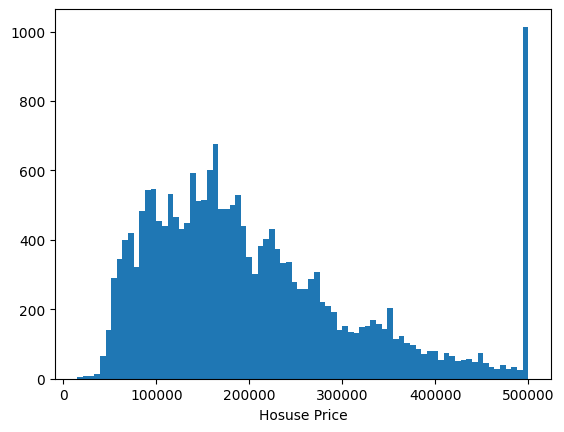

In [6]:
plt.hist(df.median_house_value, bins=80)
plt.xlabel('Hosuse Price')

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

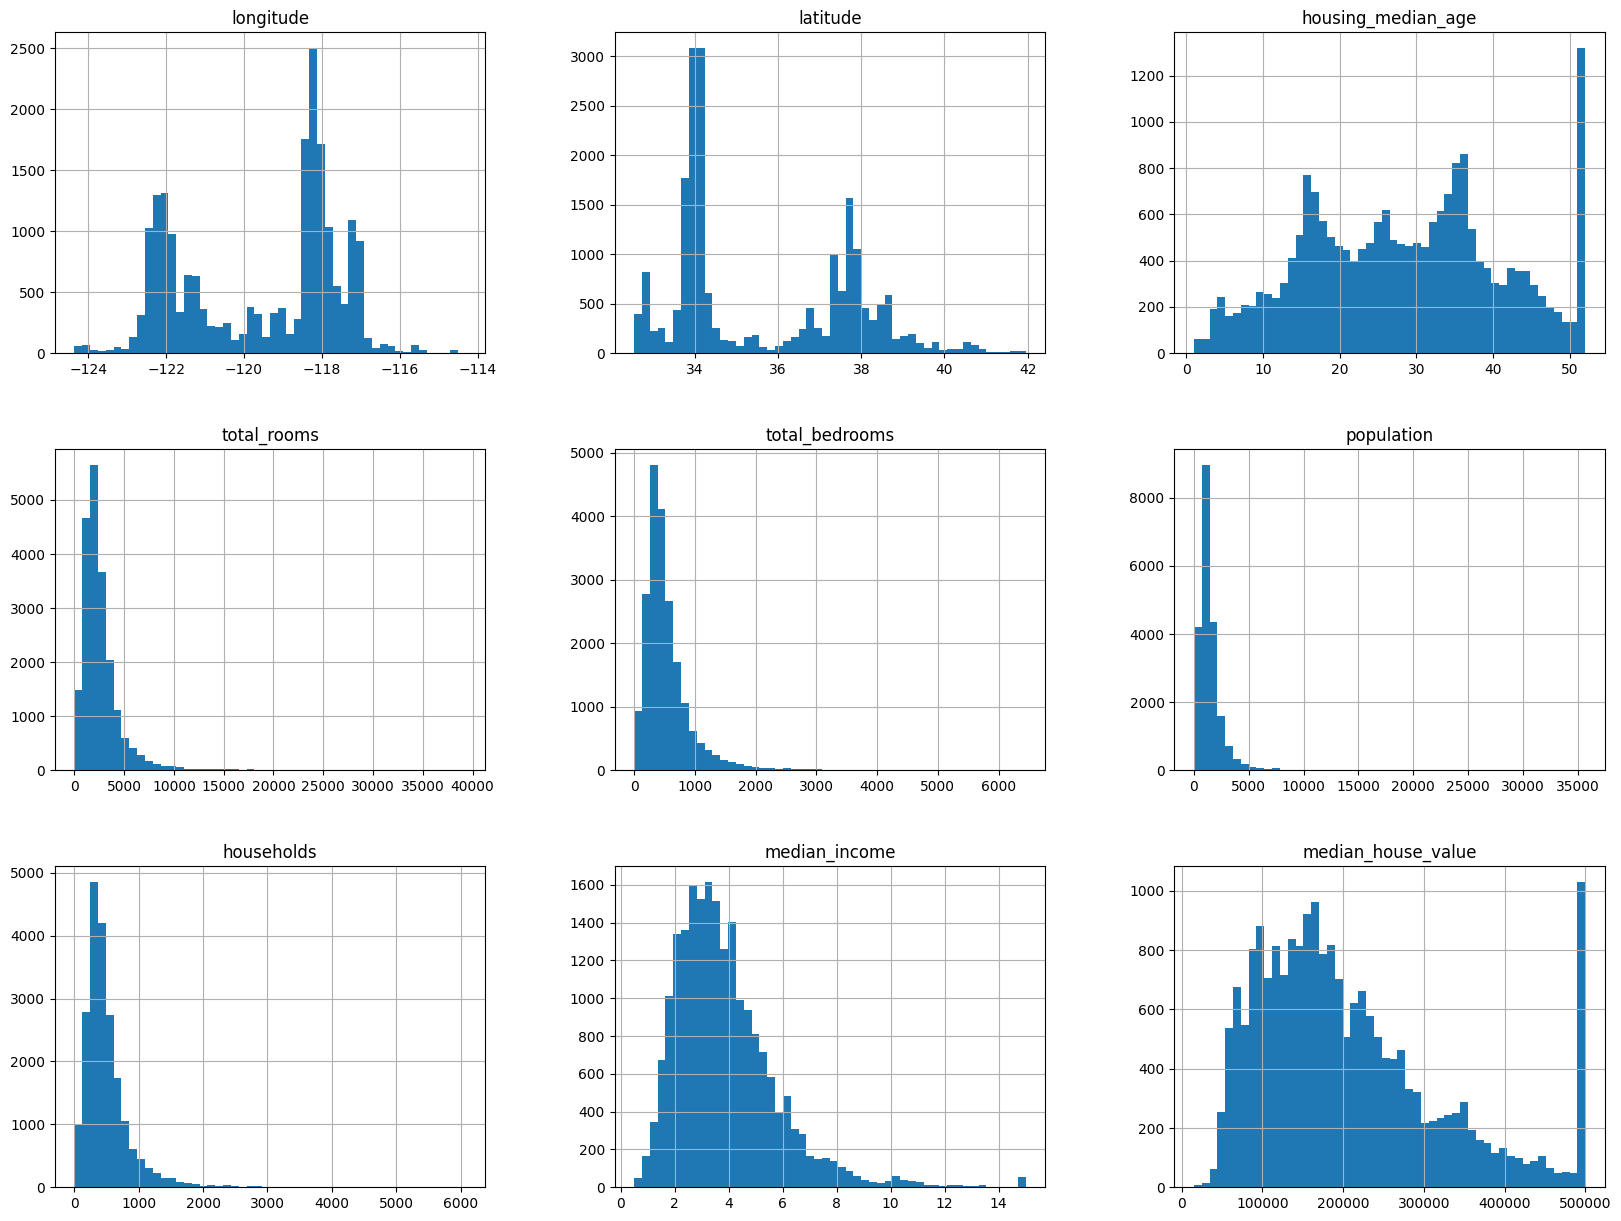

In [7]:
df.hist(bins=50, figsize=(20, 15))

In [8]:
x = df.drop('ocean_proximity', axis='columns')
x.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [9]:
corr = x.corr()
print(corr)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

In [10]:
!pip install seaborn -q 

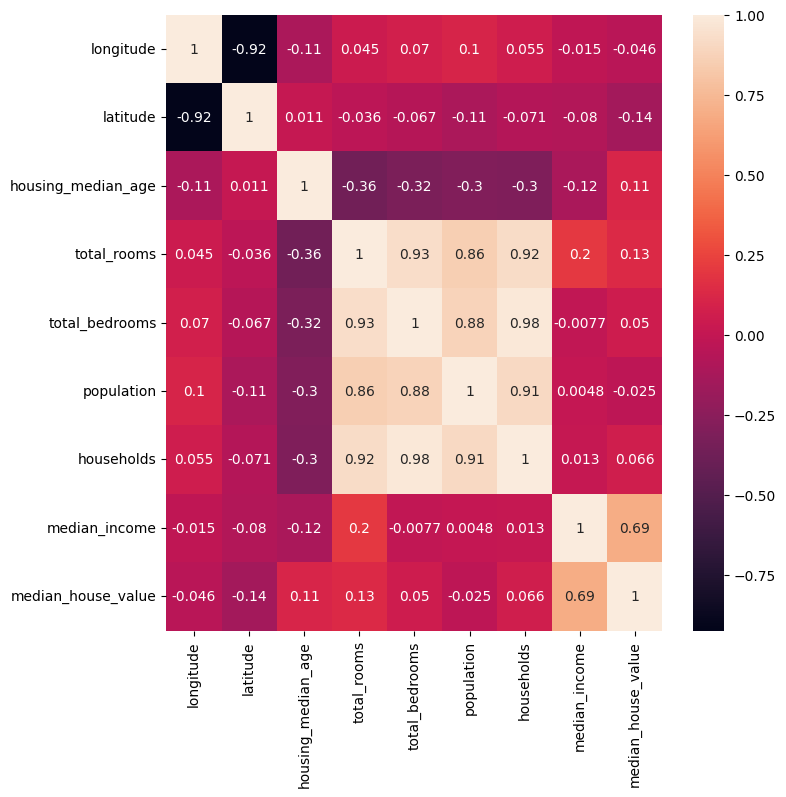

In [11]:
import seaborn as sns

plt.figure(figsize=(8,8))

sns.heatmap(corr, annot=True)
plt.show()

In [12]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [13]:
from sklearn.impute import KNNImputer

# create a temporary copy of the dataset
df_temp = df.copy()

# retrieve columns with numerical data; will exclude the ocean_proximity column since the datatype is object; other columns are float64
columns_list = [col for col in df_temp.columns if df_temp[col].dtype != 'object']

# extract columns that contain at least one missing value
new_column_list = [col for col in df_temp.loc[:, df_temp.isnull().any()]]

# update temp dataframe with numeric columns that have empty values
df_temp = df_temp[new_column_list]

In [14]:
# initialize KNNImputer to impute missing data using machine learning
knn = KNNImputer(n_neighbors = 3)

# fit function trains the model 
knn.fit(df_temp)

# transform the data using the model
# applies the transformation model (ie knn) to data
array_Values = knn.transform(df_temp)

# convert the array values to a dataframe with the appropriate column names
df_temp = pd.DataFrame(array_Values, columns = new_column_list)

In [15]:
df_temp.isnull().sum()

total_bedrooms    0
dtype: int64

In [16]:
# overlay the imputed column over the old column with missing values

# loop through the list of columns and overlay each one
for column_name in new_column_list:
    df[column_name] = df_temp.replace(df[column_name],df[column_name])

# confirm columns no longer contain null data
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## Feature Engineering

In [17]:
# Additionally we noted that several features (total_rooms,total_bedrooms,population,households) have very high correlation to one another, 
# so it's interesting to find out if a removal of a few of them would have any affect on the model performance

#  a new feature that is a ratio of the total rooms to households
df['rooms_per_household'] = df['total_rooms']/df['households']

# a new feature that is a ratio of the total bedrooms to the total rooms 
df['bedrooms_per_room'] = df['total_bedrooms']/df['total_rooms']

# a new feature that is a ratio of the population to the households 
df['population_per_household']= df['population']/df['households']

# let's combine the latitude and longitude into 1
df['coords'] = df['longitude']/df['latitude']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20640 non-null  float64
 12  population_per_household  20640 non-null  float64
 13  coords                    20640 non-null  float64
dtypes: flo

In [18]:
# remove total_rooms, households, total bedrooms, popluation, longitude, latitude
df = df.drop('total_rooms', axis=1)
df = df.drop('households', axis=1)
df = df.drop('total_bedrooms', axis=1)
df = df.drop('population', axis=1)
df = df.drop('longitude', axis=1)
df = df.drop('latitude', axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   housing_median_age        20640 non-null  float64
 1   median_income             20640 non-null  float64
 2   median_house_value        20640 non-null  float64
 3   ocean_proximity           20640 non-null  object 
 4   rooms_per_household       20640 non-null  float64
 5   bedrooms_per_room         20640 non-null  float64
 6   population_per_household  20640 non-null  float64
 7   coords                    20640 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.3+ MB


In [ ]:
df.head()

,housing_median_age,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,coords
0,41.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,-3.226769
1,21.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,-3.228209
2,52.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260,-3.229590
3,52.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945,-3.229855
4,52.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467,-3.229855


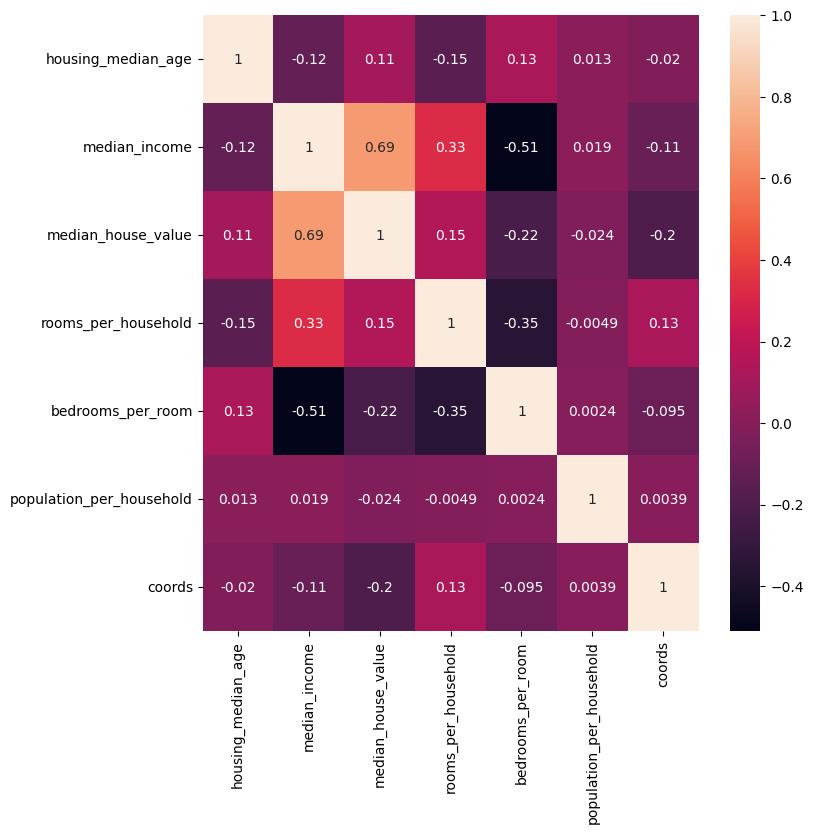

In [20]:
corr = df.corr(numeric_only=True) 

#make the heatmap larger in size
plt.figure(figsize = (8,8))

sns.heatmap(corr, annot=True)
plt.show()

## Encode categorical data

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   housing_median_age        20640 non-null  float64
 1   median_income             20640 non-null  float64
 2   median_house_value        20640 non-null  float64
 3   ocean_proximity           20640 non-null  object 
 4   rooms_per_household       20640 non-null  float64
 5   bedrooms_per_room         20640 non-null  float64
 6   population_per_household  20640 non-null  float64
 7   coords                    20640 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.3+ MB


In [22]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [23]:
df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

## One-Hot Encoding

In [24]:
#One-Hot Encoding
# Let's see how the Panda's get_dummies() function works
print(pd.get_dummies(df['ocean_proximity']))

       <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0          False   False   False      True       False
1          False   False   False      True       False
2          False   False   False      True       False
3          False   False   False      True       False
4          False   False   False      True       False
...          ...     ...     ...       ...         ...
20635      False    True   False     False       False
20636      False    True   False     False       False
20637      False    True   False     False       False
20638      False    True   False     False       False
20639      False    True   False     False       False

[20640 rows x 5 columns]


In [25]:
# let's replace the OCEAN_PROXIMITY column using get_dummies()
df_encoded = pd.get_dummies(data=df, columns=['ocean_proximity'])

# print the first few observations; notice the old OCEAN_PROXIMITY column is gone
df_encoded.head()

,housing_median_age,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,coords,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,8.3252,452600.0,6.984127,0.146591,2.555556,-3.226769,False,False,False,True,False
1,21.0,8.3014,358500.0,6.238137,0.155797,2.109842,-3.228209,False,False,False,True,False
2,52.0,7.2574,352100.0,8.288136,0.129516,2.802260,-3.229590,False,False,False,True,False
3,52.0,5.6431,341300.0,5.817352,0.184458,2.547945,-3.229855,False,False,False,True,False
4,52.0,3.8462,342200.0,6.281853,0.172096,2.181467,-3.229855,False,False,False,True,False


# Train the model

In [26]:
import sklearn
from sklearn.model_selection import train_test_split

# remove spaces from column names and convert all to lowercase and remove special characters as it could cause issues in the future
df_encoded.columns = [c.lower().replace(' ', '_').replace('<', '_') for c in df_encoded.columns]

# Split target variable and feature variables
#X = df_encoded[['housing_median_age', 'median_income','bedrooms_per_room','population_per_household','coords','ocean_proximity__1h_ocean',
                       # 'ocean_proximity_inland','ocean_proximity_island','ocean_proximity_near_bay','ocean_proximity_near_ocean']]
X = df_encoded.drop('median_house_value',axis='columns')
y = df_encoded['median_house_value']

print(X)

       housing_median_age  median_income  rooms_per_household  \
0                    41.0         8.3252             6.984127   
1                    21.0         8.3014             6.238137   
2                    52.0         7.2574             8.288136   
3                    52.0         5.6431             5.817352   
4                    52.0         3.8462             6.281853   
...                   ...            ...                  ...   
20635                25.0         1.5603             5.045455   
20636                18.0         2.5568             6.114035   
20637                17.0         1.7000             5.205543   
20638                18.0         1.8672             5.329513   
20639                16.0         2.3886             5.254717   

       bedrooms_per_room  population_per_household    coords  \
0               0.146591                  2.555556 -3.226769   
1               0.155797                  2.109842 -3.228209   
2               0.129516   

In [27]:
# Splitting the data into training and testing sets in numpy arrays
# We train the model with 70% of the samples and test with the remaining 30%
# X -> array with the inputs; y -> array of the outputs
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.2)

# Confirm how the data was split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 11)
(4128, 11)
(16512,)
(4128,)


## Linear Regression - Model Training

In [28]:
# Use scikit-learn’s LinearRegression to train the model on both the training and evaluate it on the test sets
from sklearn.linear_model import LinearRegression

# Create a Linear regressor using all the feature variables
reg_model = LinearRegression()

# Train the model using the training sets
reg_model.fit(X_train, y_train)

LinearRegression()

In [29]:
#run the predictions on the training and testing data
y_pred_test = reg_model.predict(X_test)

In [30]:
#compare the actual values (ie, target) with the values predicted by the model
pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

pred_test_df

,Actual,Predicted
20046,47700.0,104345.336280
3024,45800.0,90820.369998
15663,500001.0,215776.068599
20484,218600.0,283354.319517
9814,278000.0,245168.827947
...,...,...
15362,263300.0,225962.941236
16623,266800.0,188144.855757
18086,500001.0,434404.617285
2144,72300.0,110239.173719


In [31]:
# Determine accuracy uisng 𝑅^2
# 𝑅^2 : R squared is another way to evaluate the performance of a regression model.
# 1, means that the model is perfect and 0 means the the model will perform poorly.
r2_reg_model_test = round(reg_model.score(X_test, y_test),2)

print("R^2 Test: {}".format(r2_reg_model_test))

R^2 Test: 0.52


## RandomForestRegressor - Model Training

In [32]:
# try another machine learning algorithm : Randorm Forest
# Use scikit-learn’s Randorm Forest to train the model on both the training and evaluate it on the test sets
from sklearn.ensemble import RandomForestRegressor

# Create a  regressor using all the feature variables
rf_model = RandomForestRegressor(n_estimators=10,random_state=10)

# Train the model using the training sets
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=10)

In [33]:
#run the predictions on the training and testing data
y_rf_pred_test = rf_model.predict(X_test)

In [34]:
#compare the actual values (ie, target) with the values predicted by the model
rf_pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_rf_pred_test})

rf_pred_test_df

,Actual,Predicted
20046,47700.0,47470.0
3024,45800.0,82890.0
15663,500001.0,419150.3
20484,218600.0,284150.0
9814,278000.0,219800.0
...,...,...
15362,263300.0,229910.0
16623,266800.0,225000.0
18086,500001.0,487820.8
2144,72300.0,73670.0


In [35]:
# Determine accuracy uisng 𝑅^2
from sklearn.metrics import r2_score, mean_squared_error

score = r2_score(y_test, y_rf_pred_test)

print("R^2 - {}%".format(round(score, 2) *100))

R^2 - 76.0%


In [36]:
# Determine RMSE - Root Mean Squared Error on the test data
print('RMSE on test data: ',  mean_squared_error(y_test, y_rf_pred_test)**(0.5))

RMSE on test data:  56421.26553553773


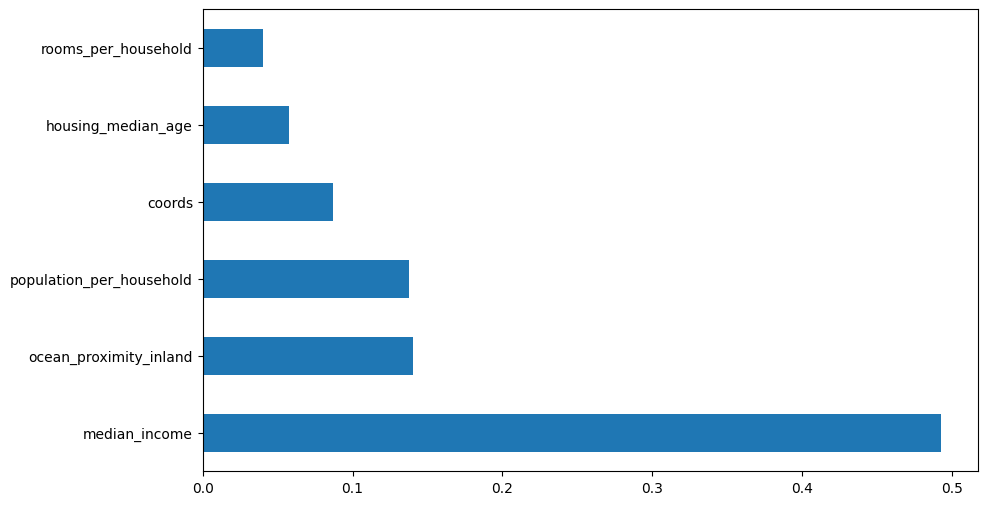

In [37]:
	
# Determine feature importance - random forest algorithm is that it gives you the ‘feature importance’ for all the variables in the data
# plot the 6 most important features 
plt.figure(figsize=(10,6))
feat_importances = pd.Series(rf_model.feature_importances_, index = X_train.columns)
feat_importances.nlargest(6).plot(kind='barh');

In [38]:
# training data with 5 most important features
train_x_if = X_train[['bedrooms_per_room', 'housing_median_age', 'coords', 'ocean_proximity_inland','population_per_household','median_income']]
test_x_if = X_test[['bedrooms_per_room', 'housing_median_age', 'coords', 'ocean_proximity_inland','population_per_household','median_income']]

# create an object of the RandfomForestRegressor Model
rf_model_if = RandomForestRegressor(n_estimators=10,random_state=10)

# fit the model with the training data
rf_model_if.fit(train_x_if, y_train)

# predict the target on the test data
predict_test_with_if = rf_model_if.predict(test_x_if)

In [39]:
# Root Mean Squared Error on the train and test data
print('RMSE on test data: ',  mean_squared_error(y_test, predict_test_with_if)**(0.5))

RMSE on test data:  57910.77066640572


# XGBoost - Model Training

In [40]:
!pip install xgboost -q

In [41]:
# try another machine learning algorithm : XGBoost
from xgboost import XGBRegressor

xgb_model = XGBRegressor()

In [42]:
# Train the model using the training sets
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [43]:
#run the predictions on the training and testing data
y_xgb_pred_test = xgb_model.predict(X_test)

In [44]:
#compare the actual values (ie, target) with the values predicted by the model
xgb_pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_xgb_pred_test})

xgb_pred_test_df

,Actual,Predicted
20046,47700.0,47042.636719
3024,45800.0,94094.601562
15663,500001.0,425418.531250
20484,218600.0,270771.906250
9814,278000.0,243807.562500
...,...,...
15362,263300.0,277294.312500
16623,266800.0,224339.906250
18086,500001.0,499030.906250
2144,72300.0,72494.328125


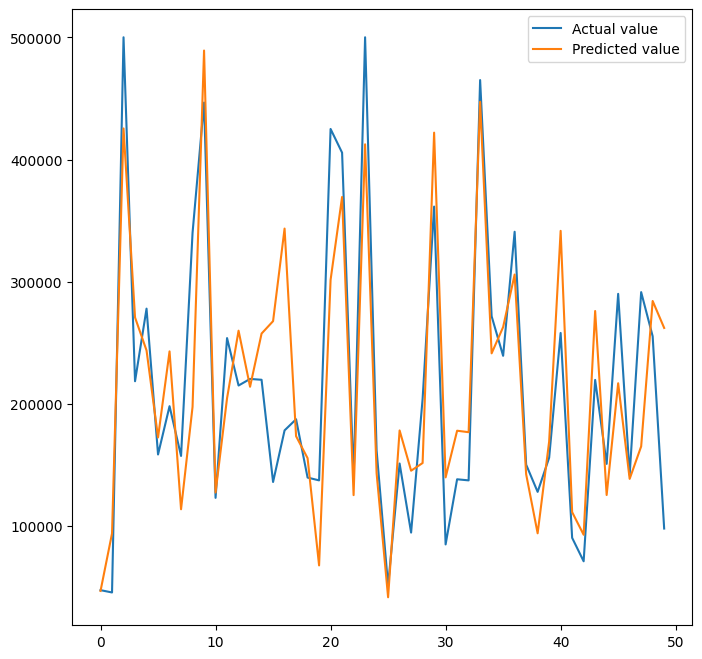

In [45]:
fig= plt.figure(figsize=(8,8))
xgb_pred_test_df = xgb_pred_test_df.reset_index()
xgb_pred_test_df = xgb_pred_test_df.drop(['index'],axis=1)
plt.plot(xgb_pred_test_df[:50])
plt.legend(['Actual value','Predicted value'])

In [46]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_xgb_pred_test)

print("R^2 - {}%".format(round(score, 2) *100))

R^2 - 77.0%


In [47]:
# Determine mean square error and root mean square error
from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error(y_test, y_xgb_pred_test)
rmse = math.sqrt(mean_squared_error(y_test, y_xgb_pred_test))

print(mse)
print(rmse)

2973802782.2219
54532.58459143395


In [48]:
# Calculate mean absolute error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, y_xgb_pred_test))


36254.82832088027


## Cross Validation

In [49]:
# We can build and score a model on multiple folds using cross-validation
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score


# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(xgb_model, X, y, scoring='r2', error_score='raise', cv=cv, n_jobs=-1, verbose=1)

#average of all the r2 scores across runs
print(scores.mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.7876668177793076


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.3s finished


## Hyperparameter Tuning

In [50]:
# determine hyperparameter available for tuning
xgb_model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'feature_weights': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [51]:
xgb_model_2 = XGBRegressor(
    gamma=0.05,
    learning_rate=0.01,
    max_depth=6,
    n_estimators=1000,
    n_jobs=16,
    objective='reg:squarederror',
    subsample=0.8,
    scale_pos_weight=0,
    reg_alpha=0,
    reg_lambda=1,
    verbosity=1)

xgb_model_2.fit(X_train, y_train)


#run the predictions on the training and testing data
y_xgb_2_pred_test = xgb_model_2.predict(X_test)

In [54]:
# compare the actual values (ie, target) with the values predicted by the model
xgb_2_pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_xgb_2_pred_test})

xgb_2_pred_test_df

,Actual,Predicted
20046,47700.0,67396.390625
3024,45800.0,87267.335938
15663,500001.0,414117.750000
20484,218600.0,257437.109375
9814,278000.0,243818.828125
...,...,...
15362,263300.0,262062.421875
16623,266800.0,241542.109375
18086,500001.0,474826.937500
2144,72300.0,81885.218750


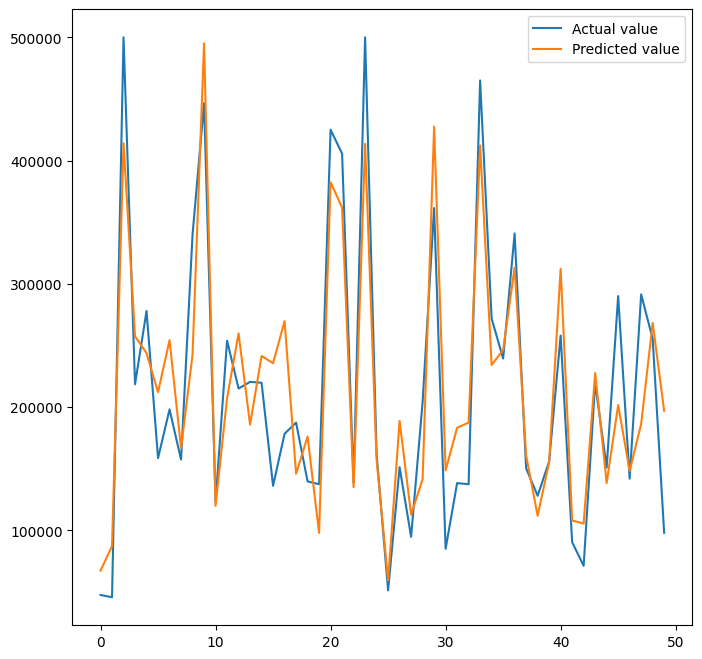

In [55]:
fig= plt.figure(figsize=(8,8))
xgb_2_pred_test_df = xgb_2_pred_test_df.reset_index()
xgb_2_pred_test_df = xgb_2_pred_test_df.drop(['index'],axis=1)
plt.plot(xgb_2_pred_test_df[:50])
plt.legend(['Actual value','Predicted value'])

In [56]:
from sklearn.metrics import mean_squared_error

mse = np.sqrt(mean_squared_error(y_test, y_xgb_2_pred_test))
print("RMSE: %.2f" % (mse**(1/2.0)))

RMSE: 230.92


In [57]:
# Determine accuracy uisng 𝑅^2
r2_xgb_model_2_test = round(xgb_model_2.score(X_test, y_test),2)

print("R^2 Test: {}".format(r2_xgb_model_2_test))

R^2 Test: 0.78
